### Loading the Data

In [101]:
import os
import pandas as pd
import chardet

file_path = r".\Sample - Superstore.csv"

# Detecting encoding
with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())
    print(f"Detected Encoding: {result['encoding']}")

# Loading with detected encoding
data = pd.read_csv(file_path, encoding=result['encoding'])

print(data.info())
print(data.head())

Detected Encoding: Windows-1252
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 

### Cleaning the Data

In [2]:
# Checking for missing values
print(data.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [3]:
# Filling or dropping missing values
data.fillna({'Region': 'Unknown', 'City': 'Unknown'}, inplace = True)

In [4]:
# Removing duplicates
data.drop_duplicates(inplace = True)

###### Deriving new metrics:

In [5]:
# Price per Unit:
data['Price_per_Unit'] = data['Sales'] / data['Quantity']

In [6]:
# Profit Margin:
data['Profit_Margin'] = data['Profit'] / data['Sales']

In [7]:
# Checking data types and null-values:
print("\nData types and missing values:")
print(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country         9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9994 non-null   int64  
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  S

### Data Enrichment

#### Holidays data

In [8]:
# Loading the holiday dataset
file_path = r".\publicHolidays.csv"
holidays_data = pd.read_csv(file_path)

# Inspecting the structure and first few rows
print(holidays_data.info())
print(holidays_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69530 entries, 0 to 69529
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            69530 non-null  int64 
 1   countryOrRegion       69530 non-null  object
 2   holidayName           69530 non-null  object
 3   normalizeHolidayName  69530 non-null  object
 4   isPaidTimeOff         3933 non-null   object
 5   countryRegionCode     64532 non-null  object
 6   date                  69530 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB
None
   Unnamed: 0 countryOrRegion                  holidayName   
0           0     New Zealand     Day after New Year's Day  \
1           1        Scotland             New Year Holiday   
2           2  United Kingdom  New Year Holiday [Scotland]   
3           3          Norway                       Søndag   
4           4          Sweden                       Söndag   

       normali

In [9]:
# Dropping unnecessary columns
holidays_data = holidays_data.drop(columns=['Unnamed: 0', 'isPaidTimeOff'], errors='ignore')

# Verifying the updated structure
print(holidays_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69530 entries, 0 to 69529
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   countryOrRegion       69530 non-null  object
 1   holidayName           69530 non-null  object
 2   normalizeHolidayName  69530 non-null  object
 3   countryRegionCode     64532 non-null  object
 4   date                  69530 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB
None


In [10]:
# Filling missing countryRegionCode with countryOrRegion
holidays_data['countryRegionCode'] = holidays_data['countryRegionCode'].fillna(holidays_data['countryOrRegion'])

# Checking for remaining missing values
print(holidays_data['countryRegionCode'].isnull().sum())

0


In [11]:
# Converting the date column to datetime format
holidays_data['date'] = pd.to_datetime(holidays_data['date'])

# Verifying the date column
print(holidays_data['date'].head())

0   1970-01-02
1   1970-01-02
2   1970-01-02
3   1970-01-04
4   1970-01-04
Name: date, dtype: datetime64[ns]


In [12]:
# Reloading the Superstore dataset with an alternative encoding
superstore_data = pd.read_csv(r".\Sample - Superstore.csv", encoding='latin1')

# Checking the first few rows and data types of both datasets to identify date columns
holidays_date_sample = holidays_data['date'].head() if 'date' in holidays_data.columns else "No 'date' column"
superstore_date_sample = superstore_data['Order Date'].head() if 'Order Date' in superstore_data.columns else "No 'Order Date' column"

holidays_date_sample, superstore_date_sample

(0   1970-01-02
 1   1970-01-02
 2   1970-01-02
 3   1970-01-04
 4   1970-01-04
 Name: date, dtype: datetime64[ns],
 0     11/8/2016
 1     11/8/2016
 2     6/12/2016
 3    10/11/2015
 4    10/11/2015
 Name: Order Date, dtype: object)

In [13]:
# Converting 'Order Date' to datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Verifying the conversion
print(superstore_data['Order Date'].head())


# Checking data types after conversion
print(holidays_data['date'].dtype)  
print(superstore_data['Order Date'].dtype)  

0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]
datetime64[ns]
datetime64[ns]


In [14]:
# Checking if any Order Dates match holiday dates
matching_dates = superstore_data['Order Date'].isin(holidays_data['date']).sum()
print(f"Matching dates: {matching_dates}")

Matching dates: 5048


In [15]:
# Adding a Country column to the Superstore data
superstore_data['Country'] = 'US'

In [16]:
# Merging datasets
merged_data = pd.merge(
    superstore_data,
    holidays_data[['date', 'countryRegionCode', 'holidayName']],  
    left_on=['Order Date', 'Country'],  
    right_on=['date', 'countryRegionCode'],
    how='left'
)

# Adding a Holiday Flag column
merged_data['Holiday_Flag'] = merged_data['countryRegionCode'].notnull().astype(int)

# Dropping unnecessary columns from the merge
merged_data.drop(columns=['date', 'countryRegionCode'], inplace=True)

# Verifying the result
print(merged_data[['Order Date', 'Holiday_Flag', 'holidayName']].dropna().head())


    Order Date  Holiday_Flag    holidayName
16  2014-11-11             1   Veterans Day
106 2017-11-23             1   Thanksgiving
107 2017-11-23             1   Thanksgiving
108 2017-11-23             1   Thanksgiving
110 2017-12-25             1  Christmas Day


In [17]:
# Checking flagged rows
flagged_rows = merged_data[merged_data['Holiday_Flag'] == 1]
print(flagged_rows.head())

     Row ID        Order ID Order Date   Ship Date       Ship Mode   
16       17  CA-2014-105893 2014-11-11  11/18/2014  Standard Class  \
106     107  CA-2017-119004 2017-11-23  11/28/2017  Standard Class   
107     108  CA-2017-119004 2017-11-23  11/28/2017  Standard Class   
108     109  CA-2017-119004 2017-11-23  11/28/2017  Standard Class   
110     111  CA-2017-146780 2017-12-25  12/30/2017  Standard Class   

    Customer ID  Customer Name    Segment Country           City  ...   
16     PK-19075      Pete Kriz   Consumer      US        Madison  ...  \
106    JM-15250   Janet Martin   Consumer      US      Charlotte  ...   
107    JM-15250   Janet Martin   Consumer      US      Charlotte  ...   
108    JM-15250   Janet Martin   Consumer      US      Charlotte  ...   
110    CV-12805  Cynthia Voltz  Corporate      US  New York City  ...   

          Product ID         Category Sub-Category   
16   OFF-ST-10004186  Office Supplies      Storage  \
106  TEC-AC-10003499       Techn

In [18]:
# Saving the updated dataset to a CSV file
merged_data.to_csv('merged_sales_holidays.csv', index=False)
print("Updated dataset saved as 'merged_sales_holidays.csv'.")

Updated dataset saved as 'merged_sales_holidays.csv'.


In [19]:
# Renaming the column 'actual_column_name' in holidays_data to 'holiday_name' for clarity.
holidays_data.rename(columns={'actual_column_name': 'holiday_name'}, inplace=True)

In [20]:
# Filtering holidays_data to include only holidays in the United States.
us_holidays = holidays_data[holidays_data['countryRegionCode'] == 'US']

In [21]:
# Creating a copy of the superstore_data DataFrame and assign it to sales_data for further processing.
sales_data = superstore_data.copy()

In [22]:
# Ensuring 'Order Date' in sales_data is datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')

# Ensuring 'date' in us_holidays is datetime using .loc to avoid the warning
us_holidays.loc[:, 'date'] = pd.to_datetime(us_holidays['date'], errors='coerce')

# Merging datasets
sales_data = pd.merge(
    sales_data,
    us_holidays[['date', 'holidayName']],  
    left_on='Order Date',
    right_on='date',
    how='left'
)

# Dropping the redundant 'date' column after merging
sales_data.drop(columns=['date'], inplace=True)

# Verifying the result
print(sales_data[['Order Date', 'holidayName']].dropna().head())

    Order Date    holidayName
16  2014-11-11   Veterans Day
106 2017-11-23   Thanksgiving
107 2017-11-23   Thanksgiving
108 2017-11-23   Thanksgiving
110 2017-12-25  Christmas Day


### Weather API 

#### ONE TIME CITY TO COORD MAPPING!!!

In [23]:
import requests

# OpenCage API key
geocode_api_key = "c4b2e0677035476ea143ccb45c053b7b"
geocode_url = "https://api.opencagedata.com/geocode/v1/json"

# Unique cities from the dataset
unique_cities = sales_data['City'].dropna().unique()

# Dictionary to store city-to-coordinates mapping
city_to_coords = {}

# Fetching coordinates for each city
for city in unique_cities:
    response = requests.get(
        geocode_url,
        params={"q": city, "key": geocode_api_key}
    )
    if response.status_code == 200:
        results = response.json().get("results")
        if results:
            geometry = results[0]["geometry"]
            city_to_coords[city] = (geometry["lat"], geometry["lng"])
        else:
            print(f"No results for city: {city}")
            city_to_coords[city] = None
    else:
        print(f"Error fetching coordinates for {city}: {response.status_code}")

# Saving coordinates for reuse
import json
with open("city_to_coords.json", "w") as f:
    json.dump(city_to_coords, f)

print("City-to-coordinates mapping complete!")


City-to-coordinates mapping complete!


#### Merging coordinates into sales dataset

In [ ]:
import json
import pandas as pd

# Loading sales dataset
sales_data_path = "merged_sales_holidays.csv"  # Replace with your dataset path
sales_data = pd.read_csv(sales_data_path)

# Loading cached coordinates
with open("city_to_coords.json", "r") as f:
    city_to_coords = json.load(f)

# Adding latitude and longitude to the dataset
sales_data['Latitude'] = sales_data['City'].map(lambda city: city_to_coords.get(city, (None, None))[0])
sales_data['Longitude'] = sales_data['City'].map(lambda city: city_to_coords.get(city, (None, None))[1])

# Saving the updated dataset
updated_sales_data_path = "updated_sales_with_coordinates.csv"
sales_data.to_csv(updated_sales_data_path, index=False)
print(f"Updated sales data saved to: {updated_sales_data_path}")

#### Integrating and Merging weather data to sales dataset

#### Calling VisualCrossing API to fetch weather data

In [ ]:
import requests
import pandas as pd
import calendar
import time

# Visualing Crossing API endpoint and key
api_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"
api_key = "L2NNS7U28LZLFEE6EYYK4L2HU"  

# Loading the sales dataset
sales_data = pd.read_csv("updated_sales_with_coordinates.csv")
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Getting the list of required city-date pairs
required_weather_data_points = sales_data[['City', 'Latitude', 'Longitude', 'Order Date']].drop_duplicates()

# Loading previously saved weather data
try:
    fetched_weather_data = pd.read_csv("weather_data.csv")
    fetched_weather_data['Date'] = pd.to_datetime(fetched_weather_data['Date'])
    print("Loaded previously fetched weather data.")
except FileNotFoundError:
    fetched_weather_data = pd.DataFrame(columns=['City', 'Date', 'Max Temp (°C)', 'Min Temp (°C)', 'Precipitation (mm)'])
    print("No previous data found. Starting fresh.")

# Identifying missing city-date pairs
fetched_pairs = fetched_weather_data[['City', 'Date']].drop_duplicates()
missing_data_points = pd.merge(
    required_weather_data_points,
    fetched_pairs,
    left_on=['City', 'Order Date'],
    right_on=['City', 'Date'],
    how='left',
    indicator=True
).query('_merge == "left_only"').drop(columns=['Date', '_merge'])

print(f"Total missing data points: {len(missing_data_points)}")

# Initializing storage for new weather data
weather_data = fetched_weather_data.to_dict('records')  # Converting existing data to a list of dictionaries
current_calls = 0
daily_limit = 1000  # Based on the API's free-tier limit

# Looping through missing data points
for index, row in missing_data_points.iterrows():
    city, lat, lon, date = row['City'], row['Latitude'], row['Longitude'], row['Order Date']
    start_date = date.strftime('%Y-%m-%d')
    end_date = start_date  # Single day fetching

    # Fetching weather data
    response = requests.get(f"{api_url}/{lat},{lon}/{start_date}/{end_date}", params={
        "unitGroup": "metric",
        "include": "days",
        "key": api_key
    })

    if response.status_code == 200:
        # Parsing the weather data
        data = response.json().get("days", [])
        for entry in data:
            weather_data.append({
                "City": city,
                "Date": entry["datetime"],
                "Max Temp (°C)": entry.get("tempmax"),
                "Min Temp (°C)": entry.get("tempmin"),
                "Precipitation (mm)": entry.get("precip")
            })
        current_calls += 1
    else:
        print(f"Failed to fetch data for {city} on {start_date}: {response.text}")

    # Saving progress incrementally
    if current_calls % 100 == 0 or current_calls >= daily_limit:
        print(f"Saving progress... Calls made: {current_calls}")
        pd.DataFrame(weather_data).to_csv("weather_data_partial.csv", index=False)
        print("Progress saved to weather_data_partial.csv.")

    # Checking if daily limit is reached
    if current_calls >= daily_limit:
        print("Daily limit reached. Pausing until tomorrow...")
        time.sleep(86400)  # Pause for 24 hours
        current_calls = 0  # Reset the counter

# Finally saving after completing all data fetches
pd.DataFrame(weather_data).to_csv("weather_data_complete.csv", index=False)
print("Weather data fetching complete! Saved to weather_data_complete.csv.")

#### Data Cleaning for Weather Integration

After fetching the weather data, city values from the updated_sales_with_coordinates.csv file were matched with corresponding city entries in the weather_data.csv file using a VLOOKUP operation. Any unmatched entries or those showing N/A values were either removed or handled appropriately to ensure data consistency and accuracy for further analysis.

In [24]:
import pandas as pd

# File paths
sales_file_path = r".\updated_sales_with_coordinates.csv"  
weather_file_path = r".\weather_data.csv"  

# Loading datasets
sales_data = pd.read_csv(sales_file_path)
weather_data = pd.read_csv(weather_file_path)

# Converting Date columns to datetime for consistency
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

In [25]:
# Standardizing city names in both datasets by converting to lowercase and stripping extra spaces
sales_data['City'] = sales_data['City'].str.lower().str.strip()
weather_data['City'] = weather_data['City'].str.lower().str.strip()

In [27]:
# Merging sales_data with weather_data based on City and Date
merged_data = pd.merge(
    sales_data,
    weather_data,
    left_on=['City', 'Order Date'],
    right_on=['City', 'Date'],
    how='left'
)

In [28]:
# Verifying if the merge was successful
print(merged_data.head())  

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID   
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520  \
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment Country             City  ... Discount   
0      Claire Gute   Consumer      US        henderson  ...     0.00  \
1      Claire Gute   Consumer      US        henderson  ...     0.00   
2  Darrin Van Huff  Corporate      US      los angeles  ...     0.00   
3   Sean O'Donnell   Consumer      US  fort lauderdale  ...     0.45   
4   Sean O'Donnell   Consumer      US  fort lauderdale  ...     0.20   

     Profit holidayName Holiday_Flag   Latitude   Longitude       Date   
0   41.9136 

In [29]:
# Standardizing the 'City' column in weather_data by converting to lowercase and stripping whitespace.
weather_data['City'] = weather_data['City'].str.lower().str.strip()

In [30]:
print(weather_data.columns)

Index(['City', 'Date', 'Max Temp (°C)', 'Min Temp (°C)', 'Precipitation (mm)'], dtype='object')


### Exploraytory Data Analysis (EDA)

#### Sales Trends

In [31]:
# Calculating total sales for each month by grouping 'Order Date' by month.
sales_trends = sales_data.groupby(sales_data['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()

# Renaming columns for better readability: 'Order Date' to 'Month' and 'Sales' to 'Total Sales'.
sales_trends.rename(columns={'Order Date': 'Month', 'Sales': 'Total Sales'}, inplace=True)

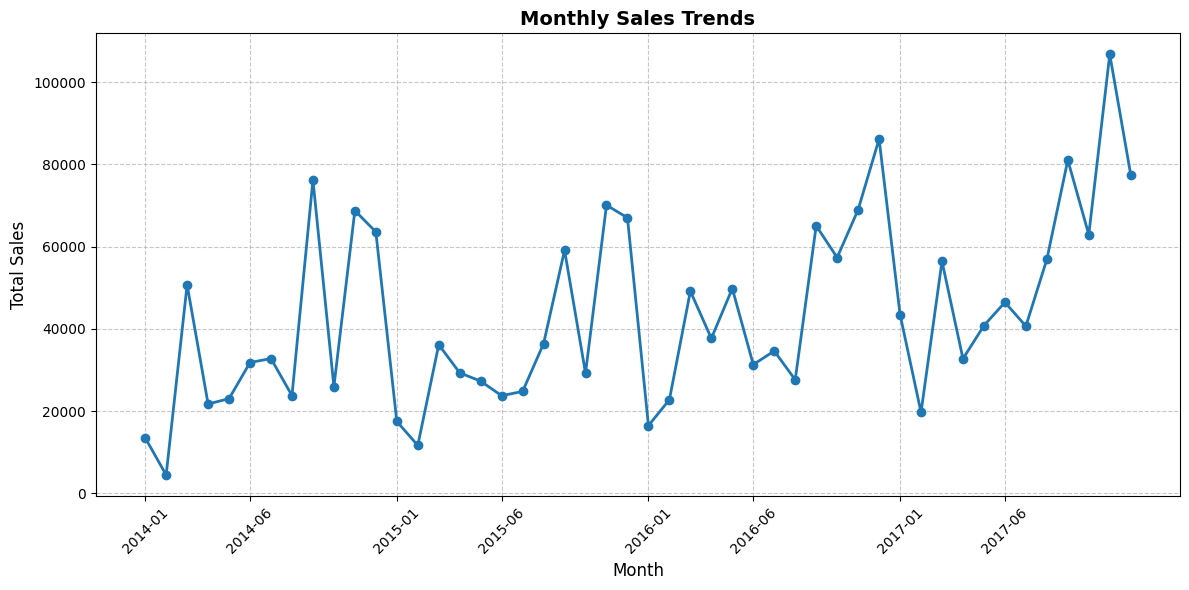

In [32]:
import matplotlib.pyplot as plt

# Ensuring the 'Month' column is a string type
sales_trends['Month'] = sales_trends['Month'].astype(str)

# Filtering the dataset to include only January and June of each year
filtered_months = sales_trends[
    sales_trends['Month'].str.endswith('-01') | sales_trends['Month'].str.endswith('-06')
]

# Setting figure size
plt.figure(figsize=(12, 6))

# Plotting the sales trends
plt.plot(sales_trends['Month'], sales_trends['Total Sales'], marker='o', linestyle='-', linewidth=2)

# Adjusting x-axis ticks for start (January) and midpoint (June) of every year
plt.xticks(
    ticks=filtered_months.index,
    labels=filtered_months['Month'],
    rotation=45
)

# Adding titles and labels
plt.title('Monthly Sales Trends', fontsize=14, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Displaying the chart
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

#### Holiday Impact

In [33]:
# Calculating average sales for holidays and non-holidays and reset the index.
holiday_sales = sales_data.groupby('Holiday_Flag')['Sales'].mean().reset_index()

# Renaming the 'Sales' column to 'Average Sales' for clarity.
holiday_sales.rename(columns={'Sales': 'Average Sales'}, inplace=True)

In [34]:
# Identifying the top 10 products by total sales, along with their total profit.
top_products = sales_data.groupby('Product ID').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).sort_values(by='Total_Sales', ascending=False).head(10)

In [35]:
# Aggregating by City
top_cities = sales_data.groupby('City').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).sort_values(by='Total_Sales', ascending=False).head(10)

print(top_cities)

               Total_Sales  Total_Profit
City                                    
new york city  256368.1610    62036.9837
los angeles    175851.3410    30440.7579
seattle        119540.7420    29156.0967
san francisco  112669.0920    17507.3854
philadelphia   109077.0130   -13837.7674
houston         64504.7604   -10153.5485
chicago         48539.5410    -6654.5688
san diego       47521.0290     6377.1960
jacksonville    44713.1830    -2323.8350
springfield     43054.3420     6200.6974


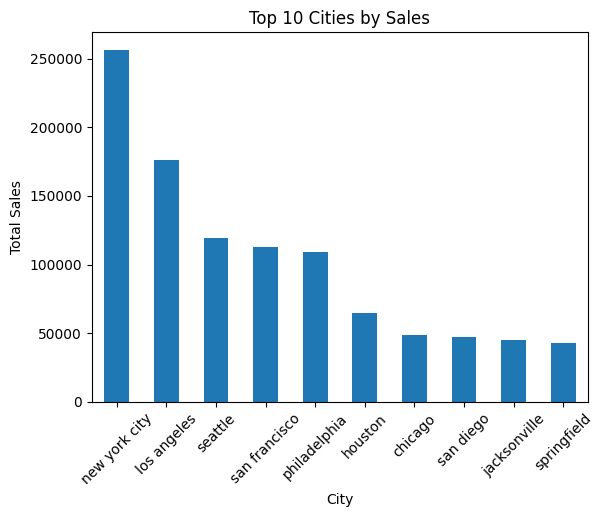

In [36]:
import matplotlib.pyplot as plt

# Ploting for cities
top_cities.plot(
    y='Total_Sales',
    kind='bar',
    title='Top 10 Cities by Sales',
    legend=False
)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

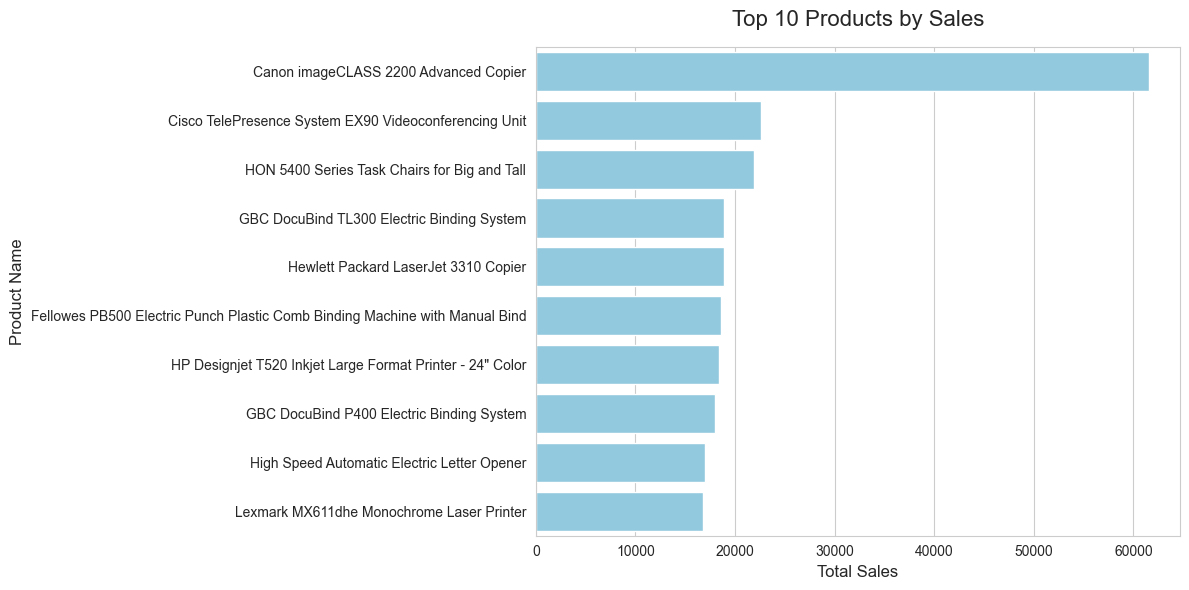

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Product Name and calculate total sales for each product
top_products = sales_data.groupby('Product Name')['Sales'].sum().reset_index()

# Sorting by total sales in descending order
top_products = top_products.sort_values(by='Sales', ascending=False).head(10)

# Setting plot style
sns.set_style("whitegrid")

# Creating a bar chart with a solid color
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Sales', y='Product Name', color='skyblue')

# Adding title and labels
plt.title('Top 10 Products by Sales', fontsize=16, pad=15)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Adjusting layout for better readability
plt.tight_layout()

# Showing the plot
plt.show()

In [38]:
print(sales_data.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'holidayName', 'Holiday_Flag', 'Latitude', 'Longitude'],
      dtype='object')


In [39]:
print(type(holiday_sales))

<class 'pandas.core.frame.DataFrame'>


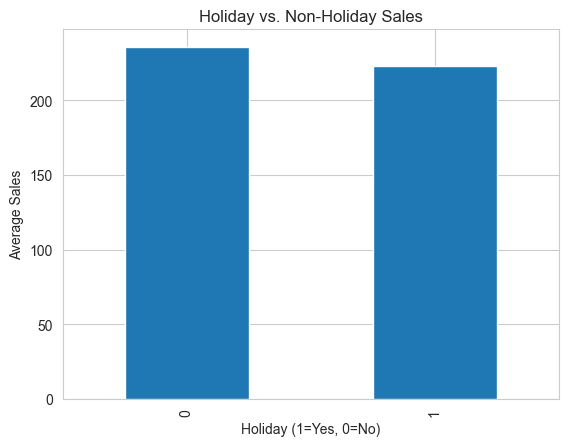

In [40]:
# Plotting average sales for holiday vs. non-holiday transactions as a bar chart.
holiday_sales.plot(
    x='Holiday_Flag',
    y='Average Sales',
    kind='bar',
    title='Holiday vs. Non-Holiday Sales',
    legend=False
)
plt.xlabel('Holiday (1=Yes, 0=No)')
plt.ylabel('Average Sales')
plt.show()

In [41]:
holiday_sales = holiday_sales.reset_index()

# Ensuring the original sales_data includes holidayName
holiday_sales = sales_data.dropna(subset=['holidayName'])[['Order Date', 'holidayName', 'Sales']]

# Extracting Year from 'Order Date'
holiday_sales['Year'] = pd.to_datetime(holiday_sales['Order Date']).dt.year

# Verifying the new DataFrame
print(holiday_sales.head())

    Order Date    holidayName    Sales  Year
16  2014-11-11   Veterans Day  665.880  2014
106 2017-11-23   Thanksgiving   74.112  2017
107 2017-11-23   Thanksgiving   27.992  2017
108 2017-11-23   Thanksgiving    3.304  2017
110 2017-12-25  Christmas Day   41.960  2017


In [42]:
print(sales_data[['Order Date', 'holidayName']].dropna().head())

    Order Date    holidayName
16  2014-11-11   Veterans Day
106 2017-11-23   Thanksgiving
107 2017-11-23   Thanksgiving
108 2017-11-23   Thanksgiving
110 2017-12-25  Christmas Day


In [43]:
print(holiday_sales.columns)

Index(['Order Date', 'holidayName', 'Sales', 'Year'], dtype='object')


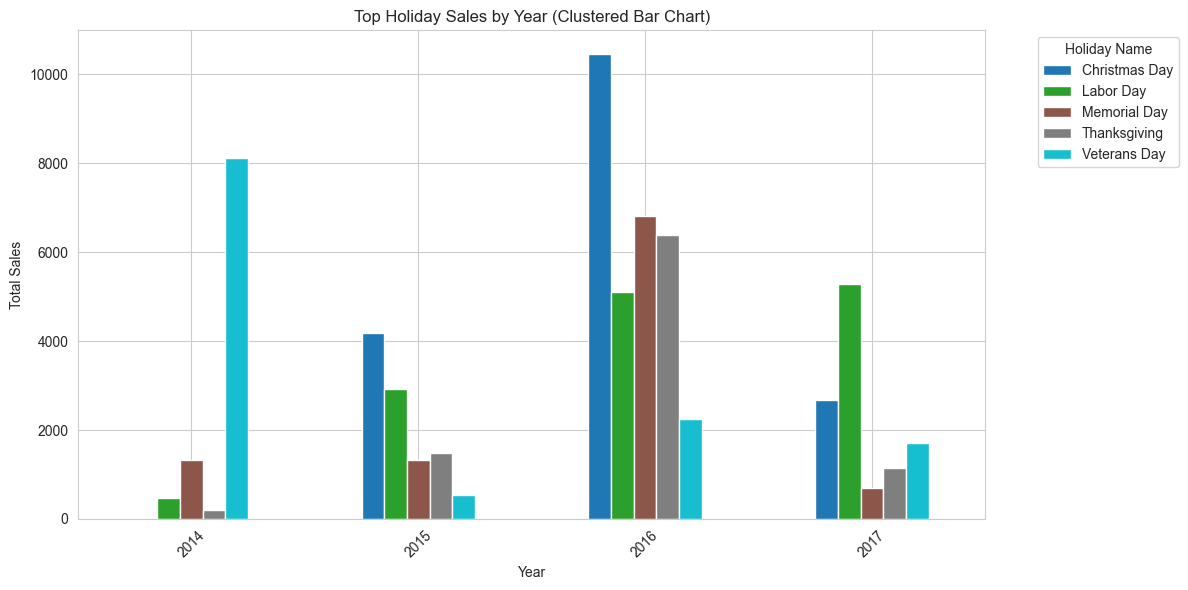

In [44]:
import matplotlib.pyplot as plt

# Grouping by Year and Holiday Name to calculate total sales
holiday_sales_grouped = holiday_sales.groupby(['Year', 'holidayName'])['Sales'].sum().reset_index()

# Finding the top holidays overall across all years
top_holidays_overall = holiday_sales_grouped.groupby('holidayName')['Sales'].sum().nlargest(5).index.tolist()

# Filtering the dataset for the top holidays
filtered_holiday_sales = holiday_sales_grouped[holiday_sales_grouped['holidayName'].isin(top_holidays_overall)]

# Pivoting data for visualization
pivot_data = filtered_holiday_sales.pivot(index='Year', columns='holidayName', values='Sales')

# Creating a clustered bar chart
pivot_data.plot(kind='bar', figsize=(12, 6), colormap='tab10')

# Customizing the chart
plt.title("Top Holiday Sales by Year (Clustered Bar Chart)")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Holiday Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Showing the chart
plt.show()

# Save the chart (optional)
# plt.savefig('improved_holiday_sales_chart.png')

### Customer segmentation

#### Spending Behaviour

In [45]:
# Aggregating total sales and order count for each customer.
customer_segments = sales_data.groupby('Customer ID').agg(
    Total_Sales=('Sales', 'sum'),
    Purchase_Count=('Order ID', 'count')
).reset_index()

In [46]:
# Categorizing customers into spending categories based on their total sales.
customer_segments['Spending_Category'] = pd.cut(
    customer_segments['Total_Sales'],
    bins=[0, 1000, 5000, 10000, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [47]:
# Performing customer segmentation using KMeans clustering.
from sklearn.cluster import KMeans

# Initializing KMeans with 4 clusters and 10 initialization runs for robustness also n_init explicitly set
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)

# Fit and predict clusters
customer_segments['Cluster'] = kmeans.fit_predict(
    customer_segments[['Total_Sales', 'Purchase_Count']]
)

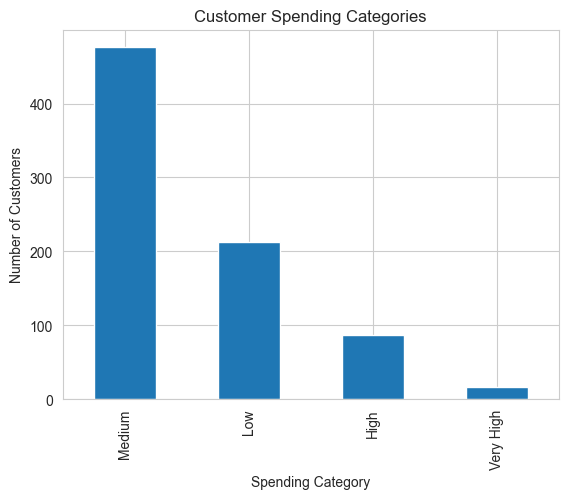

In [48]:
# Visualizing the distribution of customers across spending categories.
customer_segments['Spending_Category'].value_counts().plot(
    kind='bar',
    title='Customer Spending Categories',
    xlabel='Spending Category',
    ylabel='Number of Customers'
)
plt.show()

In [49]:
# Grouping by 'Customer ID' to calculate total sales and purchase count per customer
customer_segments = sales_data.groupby('Customer ID').agg(
    Total_Sales=('Sales', 'sum'),
    Purchase_Count=('Order ID', 'count')
).reset_index()

# Adding spending categories based on total sales
customer_segments['Spending_Category'] = pd.cut(
    customer_segments['Total_Sales'],
    bins=[0, 1000, 5000, 10000, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Filtering frequent spenders (customers with more than 10 purchases)
frequent_spenders = customer_segments[customer_segments['Purchase_Count'] > 10]
frequent_spenders = frequent_spenders.sort_values(by='Purchase_Count', ascending=False)

# Filtering high spenders (customers in the "Very High" spending category)
high_spenders = customer_segments[customer_segments['Spending_Category'] == 'Very High']
high_spenders = high_spenders.sort_values(by='Total_Sales', ascending=False)

# Printing insights
print("Frequent Spenders (More than 10 purchases):")
print(frequent_spenders[['Customer ID', 'Total_Sales', 'Purchase_Count']])

print("\nHigh Spenders (Total Sales in 'Very High' Category):")
print(high_spenders[['Customer ID', 'Total_Sales', 'Purchase_Count']])

# Optional: Save customer insights as CSV files (uncomment if needed)
# frequent_spenders.to_csv('frequent_spenders_sorted.csv', index=False)
# high_spenders.to_csv('high_spenders_sorted.csv', index=False)

Frequent Spenders (More than 10 purchases):
    Customer ID  Total_Sales  Purchase_Count
787    WB-21850     6160.102              37
387    JL-15835     9799.923              34
349    JD-15895     7610.864              32
720    SV-20365    11470.950              32
606    PP-18955     6551.118              31
..          ...          ...             ...
218    DL-12925     2859.960              11
530    MO-17800     1687.027              11
206    DH-13675     1043.096              11
197    DB-13615     1989.050              11
0      AA-10315     5563.560              11

[396 rows x 3 columns]

High Spenders (Total Sales in 'Very High' Category):
    Customer ID  Total_Sales  Purchase_Count
700    SM-20320    25043.050              15
741    TC-20980    19052.218              12
621    RB-19360    15036.624              14
730    TA-21385    14595.620              10
434    KL-16645    14175.229              29
669    SC-20095    14126.782              21
6      AB-10105    1400

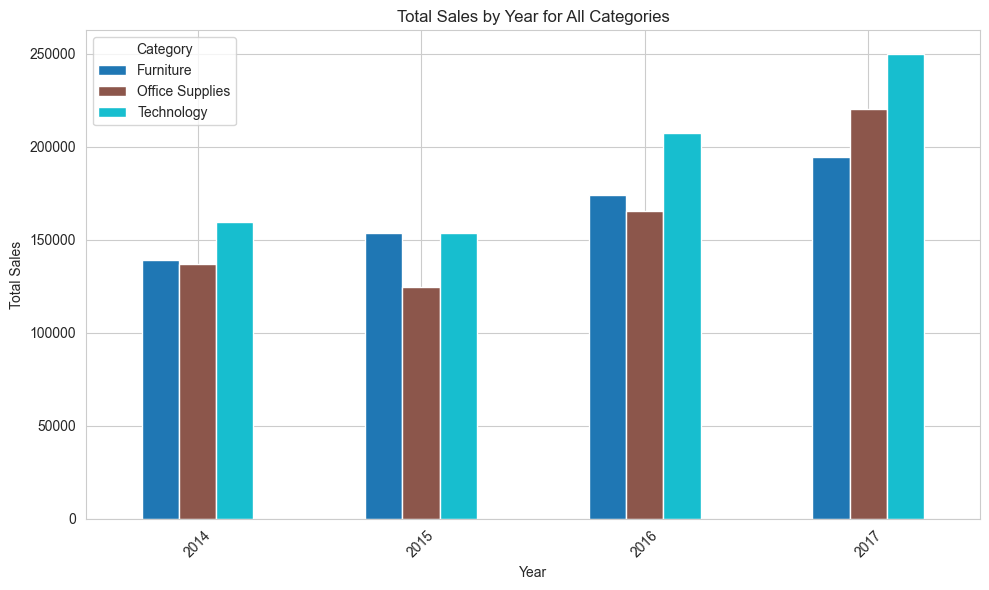

In [50]:
import matplotlib.pyplot as plt

# Adding a new column for the year extracted from the Order Date
sales_data['Year'] = sales_data['Order Date'].dt.year

# Grouping by Year and Category to calculate total sales for all categories
yearly_sales = sales_data.groupby(['Year', 'Category'])['Sales'].sum().unstack()

# Plotting a clustered bar chart
yearly_sales.plot(kind='bar', figsize=(10, 6), colormap='tab10')

# Customizing the chart
plt.title("Total Sales by Year for All Categories")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()

# Showing the plot
plt.show()

# Save the chart as an image (optional)
# plt.savefig('clustered_bar_chart_all_categories.png')

#### Correlations betweeen Sales and External Factors

In [51]:
print(sales_data['Order Date'].dtype)
print(weather_data['Date'].dtype)

datetime64[ns]
datetime64[ns]


In [52]:
# Convert 'Order Date' in sales_data to datetime, invalid entries to NaT.
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors='coerce')

# Converting 'Date' in weather_data to datetime, invalid entries to NaT.
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

In [53]:
# Checking for invalid dates
print(sales_data[sales_data['Order Date'].isnull()])
print(weather_data[weather_data['Date'].isnull()])

# Dropping rows with missing 'Order Date' and 'Date' in sales_data.
sales_data.dropna(subset=['Order Date'], inplace=True)
weather_data.dropna(subset=['Date'], inplace=True)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, holidayName, Holiday_Flag, Latitude, Longitude, Year]
Index: []

[0 rows x 26 columns]
Empty DataFrame
Columns: [City, Date, Max Temp (°C), Min Temp (°C), Precipitation (mm)]
Index: []


In [54]:
# Merge sales_data and weather_data on 'City' and 'Order Date'/'Date' using an inner join.
matched_sales_weather = pd.merge(
    sales_data,
    weather_data,
    left_on=['City', 'Order Date'],
    right_on=['City', 'Date'],
    how='inner'
)

In [55]:
# Analyzing Weather Impact on Sales
matched_sales_weather['Weather_Type'] = matched_sales_weather['Precipitation (mm)'].apply(
    lambda x: 'Rainy' if x > 0 else 'Clear'
)
weather_sales = matched_sales_weather.groupby('Weather_Type')['Sales'].mean()

In [56]:
# Calculating the average sales for holiday and non-holiday transactions.
holiday_sales = sales_data.groupby('Holiday_Flag')['Sales'].mean()

In [57]:
# Aggregating by city
city_sales = sales_data.groupby('City').agg(
    Total_Sales=('Sales', 'sum'),
    Latitude=('Latitude', 'first'),
    Longitude=('Longitude', 'first')
).reset_index()

In [58]:
import folium

# Initializing the map
sales_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)  # Centered on the US

# Adding city sales as heatmap points
for index, row in city_sales.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Total_Sales'] / 1000,  # Scale radius to sales
        popup=f"{row['City']} - ${row['Total_Sales']:.2f}",
        color='blue',
        fill=True
    ).add_to(sales_map)

# Saving the map as HTML
sales_map.save("sales_heatmap.html")
print("Geographic heatmap saved as sales_heatmap.html.")

Geographic heatmap saved as sales_heatmap.html.


#### Advanced Analysis

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Preparing data for regression
regression_data = sales_data[['Sales', 'Discount', 'Profit', 'Holiday_Flag']]
regression_data = regression_data.dropna()

X = regression_data[['Discount', 'Profit', 'Holiday_Flag']]
y = regression_data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and evaluating regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R-squared: 0.07837159739248312
Mean Squared Error: 677853.4322535865


#### Identifying Low-Performing Stores and Products

In [60]:
import pandas as pd

# Loading the dataset
sales_data = pd.read_csv('updated_sales_with_coordinates.csv')

# Displaying first few rows to confirm loading
print(sales_data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID   
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520  \
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment Country             City  ... Sub-Category   
0      Claire Gute   Consumer      US        Henderson  ...    Bookcases  \
1      Claire Gute   Consumer      US        Henderson  ...       Chairs   
2  Darrin Van Huff  Corporate      US      Los Angeles  ...       Labels   
3   Sean O'Donnell   Consumer      US  Fort Lauderdale  ...       Tables   
4   Sean O'Donnell   Consumer      US  Fort Lauderdale  ...      Storage   

                                        Product Name    

In [61]:
# Grouping data by City and summing up Sales to calculate total sales per store
low_performing_stores = sales_data.groupby('City')['Sales'].sum().reset_index()

# Sorting stores in ascending order of total sales
low_performing_stores = low_performing_stores.sort_values('Sales', ascending=True)

# Extracting the top 10 lowest-performing stores
top_10_lowest_stores = low_performing_stores.head(10)

# Printing the result
print("Top 10 Lowest-Performing Stores:")
print(top_10_lowest_stores)

Top 10 Lowest-Performing Stores:
               City   Sales
132          Layton   4.960
117          Keller   6.000
204     Port Orange   7.824
38      Chapel Hill  14.016
171   New Brunswick  14.770
6           Antioch  19.440
55   Cuyahoga Falls  29.094
226       Royal Oak  35.340
90        Grapevine  41.528
25          Bozeman  43.660


In [62]:
# Grouping data by Product Name and summing up Sales to calculate total sales per product
low_performing_products = sales_data.groupby('Product Name')['Sales'].sum().reset_index()

# Sorting products in ascending order of total sales
low_performing_products = low_performing_products.sort_values('Sales', ascending=True)

# Extracting the top 10 lowest-performing products
top_10_lowest_products = low_performing_products.head(10)

# Printing the result
print("Top 10 Lowest-Performing Products:")
print(top_10_lowest_products)


Top 10 Lowest-Performing Products:
                                           Product Name  Sales
604   Eureka Disposable Bags for Sanitaire Vibra Gro...  1.624
1053                          Maxell 4.7GB DVD-R 5/Pack  2.574
248   Avery Hi-Liter Comfort Grip Fluorescent Highli...  3.900
207                                             Avery 5  5.760
1434  Serrated Blade or Curved Handle Hand Letter Op...  6.280
97                    Acme Serrated Blade Letter Opener  6.360
1786                                           Xerox 20  6.480
783                                 Grip Seal Envelopes  7.072
1050                          Maxell 4.7GB DVD+R 5/Pack  7.326
866   Hoover Replacement Belt for Commercial Guardsm...  7.548


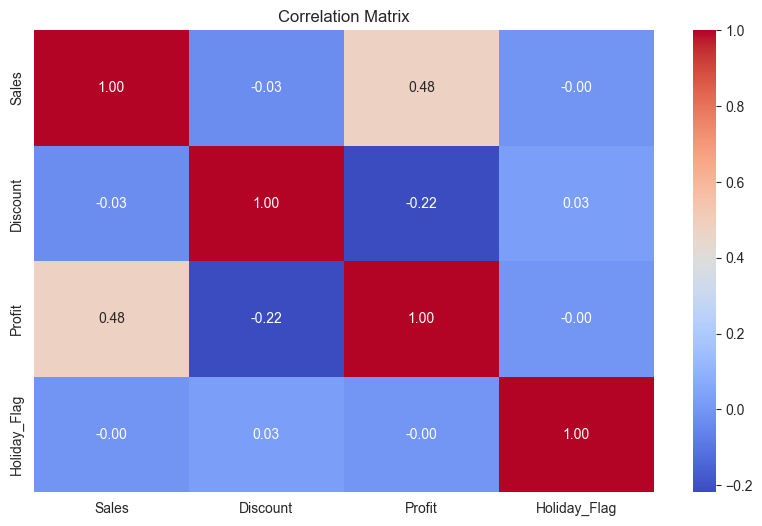

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation analysis
numerical_cols = ['Sales', 'Discount', 'Profit', 'Holiday_Flag']

# Computing correlation matrix
correlation_matrix = sales_data[numerical_cols].corr()

# Ploting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

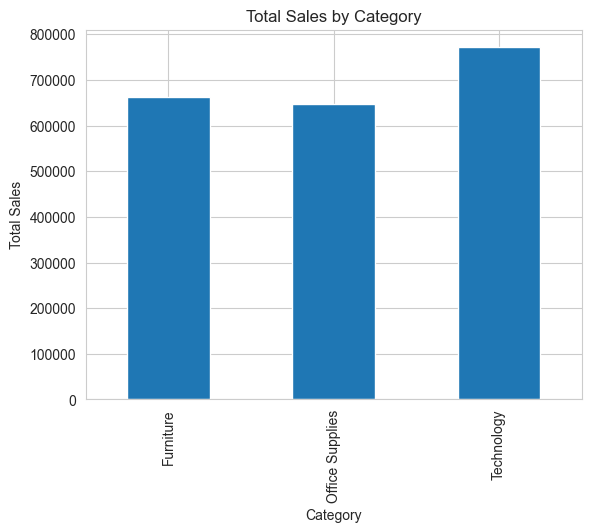

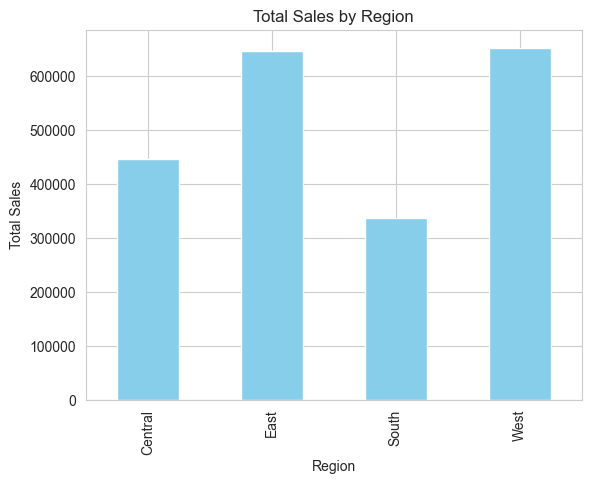

In [64]:
# Correlation analysis for sales with categorical variables
category_sales = sales_data.groupby('Category')['Sales'].sum()
region_sales = sales_data.groupby('Region')['Sales'].sum()

# Visualizing correlations
import matplotlib.pyplot as plt

# Ploting category sales
category_sales.plot(kind='bar', title='Total Sales by Category')
plt.ylabel('Total Sales')
plt.show()

# Ploting region sales
region_sales.plot(kind='bar', title='Total Sales by Region', color='skyblue')
plt.ylabel('Total Sales')
plt.show()

### Bonus Tasks

#### Marketing campaign Effectiveness Analysis

In [114]:
# Defining the function in-line.
import pandas as pd

def analyze_campaign_effectiveness(sales_data, campaign_start, campaign_end, comparison_range_days=30):
    before_start = campaign_start - pd.Timedelta(days=comparison_range_days)
    before_end = campaign_start - pd.Timedelta(days=1)
    after_start = campaign_end + pd.Timedelta(days=1)
    after_end = campaign_end + pd.Timedelta(days=comparison_range_days)

    before_campaign = sales_data[(sales_data['Order Date'] >= before_start) & (sales_data['Order Date'] <= before_end)]
    after_campaign = sales_data[(sales_data['Order Date'] >= after_start) & (sales_data['Order Date'] <= after_end)]

    before_sales = before_campaign['Sales'].sum()
    after_sales = after_campaign['Sales'].sum()

    return {
        'Before Sales': before_sales,
        'After Sales': after_sales,
        'Effectiveness': after_sales - before_sales
    }

In [116]:
import pandas as pd

# Loading dataset
sales_data = pd.read_csv('updated_sales_with_coordinates.csv')
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Campaign period
campaign_start = pd.to_datetime('2016-08-20')
campaign_end = pd.to_datetime('2016-12-24')

In [118]:
# Calling the function from the module
result = analyze_campaign_effectiveness(sales_data, campaign_start, campaign_end, comparison_range_days=30)

# Displaying results
print("Campaign Effectiveness Analysis:")
print(f"Before Sales: ${result['Before Sales']:.2f}")
print(f"After Sales: ${result['After Sales']:.2f}")
print(f"Effectiveness: ${result['Effectiveness']:.2f}")

Campaign Effectiveness Analysis:
Before Sales: $25981.33
After Sales: $49959.62
Effectiveness: $23978.29


#### Predict Future Sales

In [142]:
# Importing necessary libraries
import pandas as pd

# Loading the sales data
sales_data = pd.read_csv('updated_sales_with_coordinates.csv')

# Ensuring the 'Order Date' column is in datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Aggregating sales data to monthly totals
monthly_sales = sales_data.resample('M', on='Order Date')['Sales'].sum()

# Checking the first few rows of aggregated data
print(monthly_sales.head())

Order Date
2014-01-31    13525.535
2014-02-28     4482.650
2014-03-31    50728.039
2014-04-30    21741.586
2014-05-31    23035.288
Freq: M, Name: Sales, dtype: float64


In [138]:
# Dropping missing values
monthly_sales = monthly_sales.dropna()

# Checking for outliers
print(monthly_sales.describe())

count        48.000000
mean      43358.621798
std       22594.777868
min        4482.650000
25%       25678.750000
50%       37051.250600
75%       60070.411250
max      106750.249000
Name: Sales, dtype: float64


In [163]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Initializing the model
model = ExponentialSmoothing(
    monthly_sales, 
    seasonal='add',  
    seasonal_periods=12,  # Monthly data, so 12 periods for a year
    use_boxcox=True  # Applying Box-Cox to stabilize variance
)

# Fitting the model
model_fit = model.fit(optimized=True)

In [164]:
# Forecasting future sales
forecast = model_fit.forecast(steps=12)

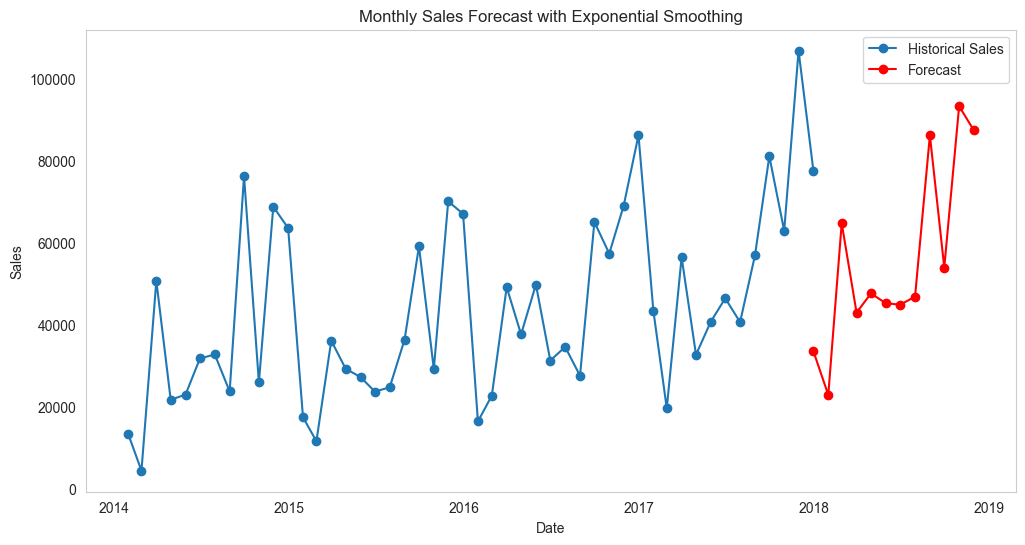

In [172]:
import matplotlib.pyplot as plt

# Plotting the historical sales data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', marker='o')

# Plotting the forecast
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M')
plt.plot(forecast_index, forecast, label='Forecast', marker='o', color='red')

# Adding labels, legend, and title
plt.title('Monthly Sales Forecast with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()